#Global Inflation Analysis (1970 - 2023)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import os

In [59]:
print('running data cleaning process : \n')
file_path = r'C:\Users\KIIT\Global_Inflation_Analysis\Data_xls\Inflation-data.xlsx'
#raw_data_workbook file path to be updated

#contains multiple sheets, some of which has metadata
workbook = pd.ExcelFile(file_path,engine="openpyxl")
#check if the first row is header:
#df = pd.read_excel(file_path, engine='openpyxl', header=1)  # Adjust index if needed
print('\n workbook.sheet_names : \n', workbook.sheet_names)  

# List all sheet names

#['Intro', 'top', 'hcpi_m', 'hcpi_q', 'hcpi_a', 'ecpi_m', 'ecpi_q', 'ecpi_a', 'fcpi_m',
# 'fcpi_q', 'fcpi_a', 'ccpi_m', 'ccpi_q', 'ccpi_a', 'ppi_m', 'ppi_q', 'ppi_a', 'def_q', 'def_a', 'Aggregate']

# Read the desired sheet: [0-based indexing]
#1.For overall inflation trends across countries → Use hcpi_a (Annual Harmonized CPI).
#2.For inflation vs. oil price analysis → Use ecpi_a (Annual Energy CPI).
#3.For a high-level summary before deeper analysis → Use Aggregate.


running data cleaning process : 


 workbook.sheet_names : 
 ['Intro', 'top', 'hcpi_m', 'hcpi_q', 'hcpi_a', 'ecpi_m', 'ecpi_q', 'ecpi_a', 'fcpi_m', 'fcpi_q', 'fcpi_a', 'ccpi_m', 'ccpi_q', 'ccpi_a', 'ppi_m', 'ppi_q', 'ppi_a', 'def_q', 'def_a', 'Aggregate']


In [60]:
#1.
proj_data=pd.read_excel(file_path,sheet_name='hcpi_a',engine="openpyxl")
#data_exploration
print('\n sheet choosen : hcpi_a : first 6 lines of hcpi_a: \n', proj_data.head(6),'\n') 




 sheet choosen : hcpi_a : first 6 lines of hcpi_a: 
   Country Code  IMF Country Code              Country Indicator Type  \
0          AFG             512.0          Afghanistan      Inflation   
1          ALB             914.0              Albania      Inflation   
2          DZA             612.0              Algeria      Inflation   
3          AGO             614.0               Angola      Inflation   
4          ATG             311.0  Antigua and Barbuda      Inflation   
5          ARG             213.0            Argentina      Inflation   

                         Series Name     1970       1971      1972       1973  \
0  Headline Consumer Price Inflation  25.5100  25.510000 -12.52000 -10.680000   
1  Headline Consumer Price Inflation      NaN        NaN       NaN        NaN   
2  Headline Consumer Price Inflation   6.6000   2.626640   3.65631   6.172840   
3  Headline Consumer Price Inflation   7.9700   5.780000  15.80000  15.670000   
4  Headline Consumer Price Inflation

In [61]:
print('\n Data Type info : \n', proj_data.info(),'\n')
#Number of rows/columns : 59 (0-based/60)
#Data types (numeric, text, etc.) : dtypes: float64(55), object(5) 
#Missing values 

#print('\n All columns',proj_data.columns,'\n') #data of years from 1970 to 2023




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      204 non-null    object 
 1   IMF Country Code  203 non-null    float64
 2   Country           203 non-null    object 
 3   Indicator Type    203 non-null    object 
 4   Series Name       203 non-null    object 
 5   1970              155 non-null    float64
 6   1971              155 non-null    float64
 7   1972              155 non-null    float64
 8   1973              156 non-null    float64
 9   1974              156 non-null    float64
 10  1975              154 non-null    float64
 11  1976              154 non-null    float64
 12  1977              154 non-null    float64
 13  1978              155 non-null    float64
 14  1979              155 non-null    float64
 15  1980              158 non-null    float64
 16  1981              162 non-null    float64
 1

In [62]:
print('checking column series name : \n',proj_data['Series Name'].head(6),'\n') #Headline Consumer Price Inflation : includes both energy and food prices



checking column series name : 
 0    Headline Consumer Price Inflation
1    Headline Consumer Price Inflation
2    Headline Consumer Price Inflation
3    Headline Consumer Price Inflation
4    Headline Consumer Price Inflation
5    Headline Consumer Price Inflation
Name: Series Name, dtype: object 



In [63]:
#Data Cleaning & Preprocessing:
print('checking missing values per col count : \v', proj_data.isnull().sum(),'\n')
#multiple missing values


checking missing values per col count :  Country Code         1
IMF Country Code     2
Country              2
Indicator Type       2
Series Name          2
1970                50
1971                50
1972                50
1973                49
1974                49
1975                51
1976                51
1977                51
1978                50
1979                50
1980                47
1981                43
1982                42
1983                42
1984                42
1985                42
1986                41
1987                40
1988                40
1989                40
1990                39
1991                36
1992                30
1993                26
1994                25
1995                24
1996                21
1997                20
1998                19
1999                18
2000                17
2001                14
2002                14
2003                11
2004                10
2005                 7
2006           

In [64]:
print('show all NaN values \n', proj_data[proj_data.isnull().any(axis=1)], '\n')

show all NaN values 
                                           Country Code  IMF Country Code  \
0                                                  AFG             512.0   
1                                                  ALB             914.0   
6                                                  ARM             911.0   
7                                                  ABW             314.0   
10                                                 AZE             912.0   
19                                                 BTN             514.0   
21                                                 BIH             963.0   
24                                                 VGB             284.0   
30                                                 KHM             522.0   
33                                                 CYM             136.0   
44                                                 HRV             960.0   
45                                                 CUW            

In [65]:
# Counts empty string values in each column
print(f"empty string values in each column : \n,{(proj_data==' ').sum()},\n")

empty string values in each column : 
,Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008           

In [66]:


print(f"Count of duplicate records : \v {proj_data.duplicated().sum()} \n")
#zero duplicates : else : proj_data = proj_data.drop_duplicates()

Count of duplicate records :  0 



In [67]:
#col wise null values : percentage : 
print('col wise null values : percentage : \n', proj_data.isnull().mean() * 100) 
#none of the cols have more than 50% null values

col wise null values : percentage : 
 Country Code         0.487805
IMF Country Code     0.975610
Country              0.975610
Indicator Type       0.975610
Series Name          0.975610
1970                24.390244
1971                24.390244
1972                24.390244
1973                23.902439
1974                23.902439
1975                24.878049
1976                24.878049
1977                24.878049
1978                24.390244
1979                24.390244
1980                22.926829
1981                20.975610
1982                20.487805
1983                20.487805
1984                20.487805
1985                20.487805
1986                20.000000
1987                19.512195
1988                19.512195
1989                19.512195
1990                19.024390
1991                17.560976
1992                14.634146
1993                12.682927
1994                12.195122
1995                11.707317
1996                10.243902
19

Checking if any pattern in missing data exists : 



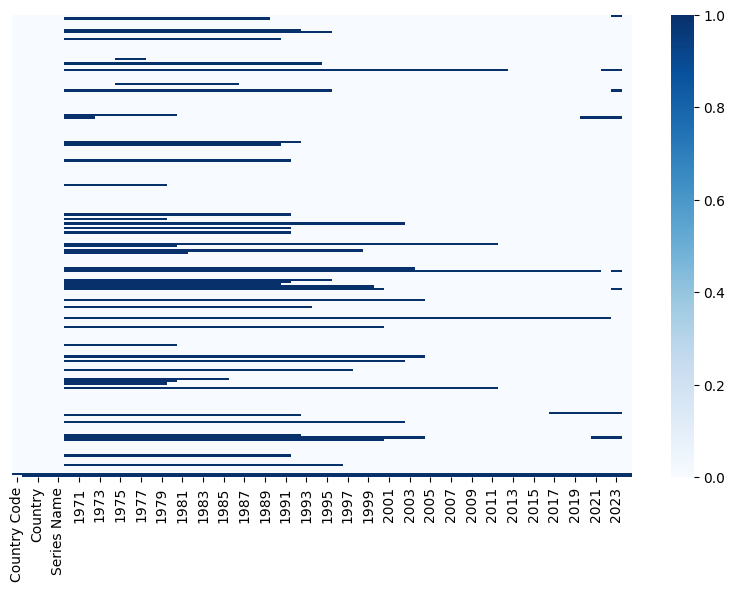

In [68]:
#checking for patterens in missing data:
print("Checking if any pattern in missing data exists : \n")
plt.figure(figsize=(10,6))
sns.heatmap(proj_data.isnull(), cmap='Blues', cbar=True, yticklabels=False)
plt.show()



 Checking country wise missing data pattern 



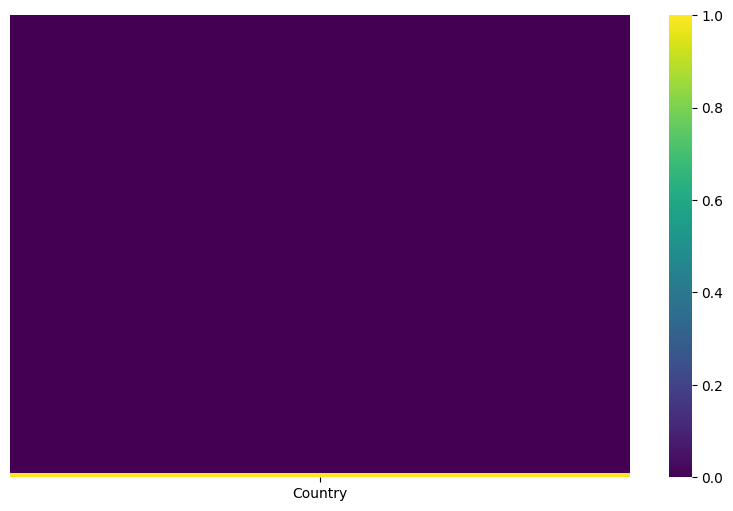

In [69]:
#for just country column:
print('\n Checking country wise missing data pattern \n')
plt.figure(figsize=(10,6))
sns.heatmap(proj_data[['Country']].isnull(), cmap='viridis', cbar=True, yticklabels=False)
plt.show()


## less effective in such huge data with low missing values


In [70]:
print(f"\n missing country wise data : \n {proj_data['Country'].isnull()} \n")


 missing country wise data : 
 0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203     True
204     True
Name: Country, Length: 205, dtype: bool 



In [71]:
print('Threshold= 50`%` of total row count :\v ', len(proj_data)*0.5)
print(f"\n count of non-null values per col : \v {proj_data.count()}\n") 
#so no col will be dropped by using : proj_data.dropna(thres = len(proj_data)* 0.5,axis=1) : 
# as all have more than 50% non-null values


Threshold= 50`%` of total row count :  102.5

 count of non-null values per col :  Country Code        204
IMF Country Code    203
Country             203
Indicator Type      203
Series Name         203
1970                155
1971                155
1972                155
1973                156
1974                156
1975                154
1976                154
1977                154
1978                155
1979                155
1980                158
1981                162
1982                163
1983                163
1984                163
1985                163
1986                164
1987                165
1988                165
1989                165
1990                166
1991                169
1992                175
1993                179
1994                180
1995                181
1996                184
1997                185
1998                186
1999                187
2000                188
2001                191
2002                191
200

In [72]:
#since numerical data col is time series data : forward-fill missing values :
#should not do ffill on entire data : categorical cols exist : proj_data = proj_data.fillna(method='ffill')

#since categorical cols have less than 1 % missing values and there exists diverse data as country & country code col
#replace missing categorical data with 'unknown' keeps data neutral

#pick dtypes from info 
#seperate different dtypes of col
categorical_col = proj_data.select_dtypes(include=['object']).columns
numerical_col = proj_data.select_dtypes(include=['float64']).columns

proj_data[categorical_col] = proj_data[categorical_col].fillna("unknown")

#proj_data[numerical_col]=proj_data[numerical_col].apply(pd.to_numeric, errors='coerce')

#forward and backward fill :
proj_data[numerical_col]=proj_data[numerical_col].ffill() 
#in case missing value is present in row1:
proj_data[numerical_col]=proj_data[numerical_col].bfill()

In [73]:
#cleaned up data:
print('\n count of values in each col after clean-up :\n', proj_data.isnull().count()) #205 for all cols



 count of values in each col after clean-up :
 Country Code        205
IMF Country Code    205
Country             205
Indicator Type      205
Series Name         205
1970                205
1971                205
1972                205
1973                205
1974                205
1975                205
1976                205
1977                205
1978                205
1979                205
1980                205
1981                205
1982                205
1983                205
1984                205
1985                205
1986                205
1987                205
1988                205
1989                205
1990                205
1991                205
1992                205
1993                205
1994                205
1995                205
1996                205
1997                205
1998                205
1999                205
2000                205
2001                205
2002                205
2003                205
2004            

In [74]:
print(f"\n null count : \n {proj_data.isnull().sum().sum()}\n")#1


 null count : 
 0



In [75]:
print(f"\n null count : \n {proj_data.isnull().sum()}\n") #1 in 2023
#optional : here data is small enough for a mannual check:
print('\nchecking values in year 2023 : \n', proj_data[[2023]].to_string())


 null count : 
 Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009           

In [76]:
#in order to ensure no hidden null are there:
#Sometimes, columns may have "hidden" NaN values if they’re stored as objects (strings) instead of numeric types.
proj_data[numerical_col]=proj_data[numerical_col].apply(pd.to_numeric, errors='coerce')

In [77]:
print(f"\n null count : \n {proj_data.isnull().sum()}\n") #0 in 2023


 null count : 
 Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009           

In [78]:
print('\nchecking values in year 2023 : \n', proj_data[[2023]].to_string())


checking values in year 2023 : 
            2023
0      5.565224
1      5.565224
2      9.322174
3     13.644102
4      5.067139
5    128.414708
6      1.980419
7      3.366000
8      5.597015
9      7.814134
10     8.785430
11     3.441609
12     0.178294
13     9.783334
14    11.023470
15     5.000599
16     4.049011
17     4.515479
18     4.410912
19     4.005472
20     2.576888
21     6.098000
22     5.067615
23     4.593563
24     4.593563
25     0.357064
26     9.442841
27     0.742910
28    26.941484
29     4.509157
30     2.127468
31     7.382814
32     3.879002
33     3.879002
34     2.979139
35    10.083436
36     7.581683
37     0.234837
38    11.735904
39     8.482000
40    19.894000
41     4.301746
42     0.525194
43     4.387117
44     7.941282
45     7.941282
46     3.541342
47    10.661260
48     3.305178
49     1.800000
50     4.094419
51     4.785613
52     2.215688
53    33.884776
54     4.045547
55     4.313637
56     9.159225
57     9.452177
58    32.295347
59    

In [79]:
print(f"\n null count : \n {proj_data.isnull().sum().sum()}\n")#0
#it wasn’t a truly missing value but a misformatted numeric value that got properly converted.
#pd.to_numeric(), it fixed the formatting issue and converted it into a proper number.
#takeaway : apply pd.to_numeric before Filling in NaN values.


 null count : 
 0



In [80]:
print(proj_data.info())
filename_u = 'Cleaned_file'
proj_data.to_csv(f"{filename_u}.csv", index=False)
print("\n Cleaned data saved as CSV")

cleaned_file = r'C:\Users\KIIT\Global_Inflation_Analysis\cleaned_proj_data.csv'
proj_data = pd.read_csv(cleaned_file)
print("\nCleaned data loaded from CSV, Success!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      205 non-null    object 
 1   IMF Country Code  205 non-null    float64
 2   Country           205 non-null    object 
 3   Indicator Type    205 non-null    object 
 4   Series Name       205 non-null    object 
 5   1970              205 non-null    float64
 6   1971              205 non-null    float64
 7   1972              205 non-null    float64
 8   1973              205 non-null    float64
 9   1974              205 non-null    float64
 10  1975              205 non-null    float64
 11  1976              205 non-null    float64
 12  1977              205 non-null    float64
 13  1978              205 non-null    float64
 14  1979              205 non-null    float64
 15  1980              205 non-null    float64
 16  1981              205 non-null    float64
 1

# Clean Up and Analysis Completed : Moving to EDA phase

In [81]:
#EDA phase 

print(" Project in EDA Phase : \n")
print(proj_data.info(),'\n\n')
print(proj_data.head(3),'\n\n')

 Project in EDA Phase : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      205 non-null    object 
 1   IMF Country Code  205 non-null    float64
 2   Country           205 non-null    object 
 3   Indicator Type    205 non-null    object 
 4   Series Name       205 non-null    object 
 5   1970              205 non-null    float64
 6   1971              205 non-null    float64
 7   1972              205 non-null    float64
 8   1973              205 non-null    float64
 9   1974              205 non-null    float64
 10  1975              205 non-null    float64
 11  1976              205 non-null    float64
 12  1977              205 non-null    float64
 13  1978              205 non-null    float64
 14  1979              205 non-null    float64
 15  1980              205 non-null    float64
 16  1981              

### statistics

In [82]:
#1. Mean, Median, Standard Deviation 

#1.
print("Statistics : \n")
print('data description',proj_data.describe())#.to_string())

Statistics : 

data description        IMF Country Code        1970        1971        1972        1973  \
count        205.000000  205.000000  205.000000  205.000000  205.000000   
mean         548.780488    6.098704    6.700820    8.513989   15.701141   
std          257.531391    6.627524    8.313860   12.306728   29.045266   
min          111.000000   -5.296370   -3.103850  -12.520000  -10.680000   
25%          316.000000    2.344340    2.111325    3.600000    6.918610   
50%          566.000000    4.390000    4.766440    5.749507   10.384700   
75%          728.000000    6.929850    6.800000    8.389020   15.593043   
max          968.000000   36.799999   71.300003   77.795738  352.810974   

             1974        1975        1976        1977        1978  ...  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  ...   
mean    22.426634   19.500465   19.156713   17.550259   14.934650  ...   
std     38.902113   34.927441   55.181338   25.403275   23.823294  ...

In [83]:
print(f"\n checking the no of unique countries : \t { proj_data['Country'].nunique() } \n") #204 : all unique countries
#optional : data small enooough to see
print(proj_data[['Country']].to_string(),'\n')



 checking the no of unique countries : 	 204 

                            Country
0                       Afghanistan
1                           Albania
2                           Algeria
3                            Angola
4               Antigua and Barbuda
5                         Argentina
6                           Armenia
7                             Aruba
8                         Australia
9                           Austria
10                       Azerbaijan
11                     Bahamas, The
12                          Bahrain
13                       Bangladesh
14                         Barbados
15                          Belarus
16                          Belgium
17                           Belize
18                            Benin
19                           Bhutan
20                          Bolivia
21           Bosnia and Herzegovina
22                         Botswana
23                           Brazil
24           British Virgin Islands
25              

In [84]:
print(proj_data.columns)

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', 'Note'],
      dtype='object')


#Time series data analysis :
#Goal : analysing inflation over the decades, convert data to fit all the years in a single col
#i.e. change data from wide format to long format : such that col : Country , Year and Inflation are Included
#melting : wide to long: 

In [85]:
year_col = [str(year) for year in range(1970, 2024)] #2024 not included
col_in_use = ["Country"] + year_col #created a list 

analysis_col = proj_data[col_in_use]
projdata_long = analysis_col.melt(id_vars=["Country"], var_name="Year", value_name="hcpia_Inflation")
#to ensure proper numerical formatting
projdata_long['Year'] = projdata_long['Year'].astype(int)

In [86]:
print('\n', projdata_long.head(3))
print('\n', projdata_long.tail(10))
print(f"\n {len(projdata_long)}")


        Country  Year  hcpia_Inflation
0  Afghanistan  1970            25.51
1      Albania  1970            25.51
2      Algeria  1970             6.60

                   Country  Year  hcpia_Inflation
11060          Uzbekistan  2023         9.951000
11061             Vanuatu  2023        13.002878
11062       Venezuela, RB  2023       337.458000
11063             Vietnam  2023         3.252893
11064  West Bank and Gaza  2023         5.871102
11065         Yemen, Rep.  2023        -1.225000
11066              Zambia  2023        10.953000
11067            Zimbabwe  2023       105.401982
11068             unknown  2023       105.401982
11069             unknown  2023       105.401982

 11070


In [87]:
print('\n\n', projdata_long.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          11070 non-null  object 
 1   Year             11070 non-null  int64  
 2   hcpia_Inflation  11070 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 259.6+ KB


 None


In [88]:
print(f"\n \n Data description : \n {projdata_long.describe()} \n")


 
 Data description : 
                Year  hcpia_Inflation
count  11070.000000     11070.000000
mean    1996.500000        46.394602
std       15.586488       780.060782
min     1970.000000       -72.728996
25%     1983.000000         2.346427
50%     1996.500000         5.780000
75%     2010.000000        12.296500
max     2023.000000     65374.080000 



In [89]:
print(f"\n \n Inflation data contained is for years:  {projdata_long['Year'].min()} to {projdata_long['Year'].max()} \n")


 
 Inflation data contained is for years:  1970 to 2023 



### Inflation Trends Over Time

In [90]:
#2.
print("\n Inflation Trends Over Time \n ")
#print(projdata_long.sort_values(by='hcpia_inflation', ascending=False).head(10))

Global_avg_inflation = projdata_long.groupby("Year")["hcpia_Inflation"].mean()
#since we are plotting time series data next , reset_index() is not used after groupby 
# so we can avoid declaring the x index while plotting as 'Year' is the default index here now
print("Global Average Inflation per year : \n",Global_avg_inflation)


 Inflation Trends Over Time 
 
Global Average Inflation per year : 
 Year
1970      6.098704
1971      6.700820
1972      8.513989
1973     15.701141
1974     22.426634
1975     19.500465
1976     19.156713
1977     17.550259
1978     14.934650
1979     17.364733
1980     21.950192
1981     18.928622
1982     20.848737
1983     26.613476
1984     41.196784
1985    146.974660
1986     29.091967
1987     91.879395
1988     60.024538
1989    149.300687
1990    140.850003
1991     46.647601
1992    121.532004
1993    233.273238
1994    360.371911
1995     62.014633
1996     52.260650
1997     18.157054
1998      8.934064
1999     11.143906
2000     11.731513
2001      8.187643
2002      5.836402
2003      6.013114
2004      7.044182
2005      5.360193
2006      6.310650
2007      4.785417
2008     12.198784
2009      4.572890
2010      4.373173
2011      6.301704
2012      5.643928
2013      4.607088
2014      3.983953
2015      4.202230
2016      6.890869
2017      7.331936
2018    323.4


 PLOTTING Global Inflation Trend: 


 Plot info : x : global_avg_inflation.index : (year); y : Gloabal_avg_inflation.values : (avg_inflation_rate) 



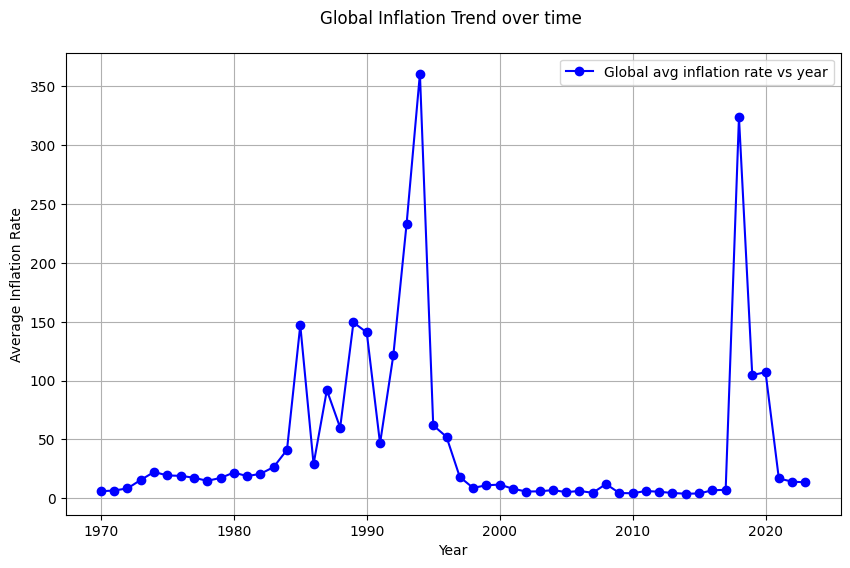

In [91]:
print("\n PLOTTING Global Inflation Trend: \n")

plt.figure(figsize=(10,6))
#x : global_avg_inflation.index : (year); y : Gloabal_avg_inflation.values : (avg_inflation_rate)
print("\n Plot info : x : global_avg_inflation.index : (year); y : Gloabal_avg_inflation.values : (avg_inflation_rate) \n")
plt.plot(Global_avg_inflation,marker="o",linestyle="-",color="b", label="Global avg inflation rate vs year")
plt.xlabel("Year")
plt.ylabel("Average Inflation Rate")
plt.title("Global Inflation Trend over time \n")
plt.legend()
plt.grid(True)
plt.show()

### Finding the countries with highest and lowest avg inflation in 2023 

In [92]:
#3.
print("\n Finding the countries with highest and lowest inflation in 2023 : \n")
latest_year = projdata_long['Year'].max()

highest_inflation = projdata_long[projdata_long['Year']== latest_year].nlargest(10, "hcpia_Inflation")
lowest_inflation = projdata_long[projdata_long['Year']==latest_year].nsmallest(10, "hcpia_Inflation")


 Finding the countries with highest and lowest inflation in 2023 : 




 Top 10 countries with the highest inflation rate in : 2023 
 


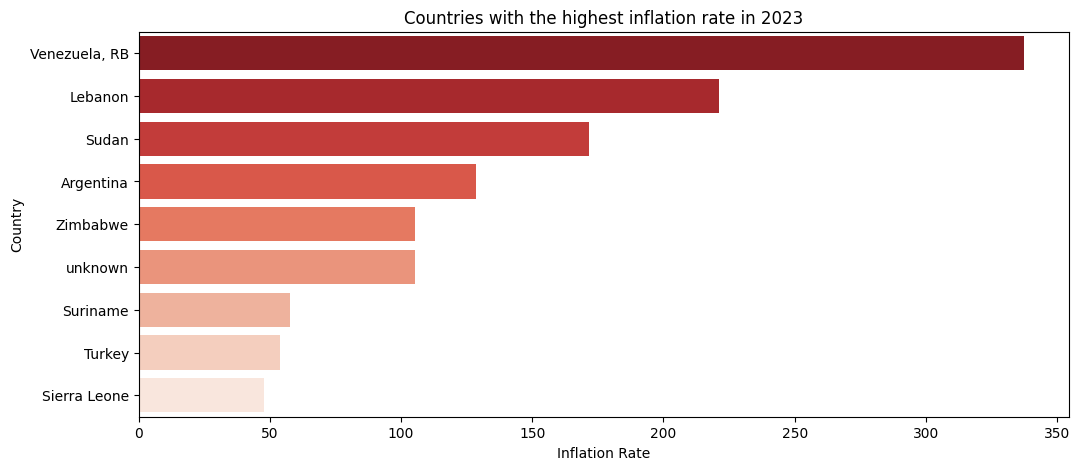

In [93]:
#highest inflation rate
print(f"\n Top 10 countries with the highest inflation rate in : {latest_year} \n ")
plt.figure(figsize=(12 , 5 ))
sns.barplot(y=highest_inflation['Country'], x=highest_inflation['hcpia_Inflation'], palette='Reds_r',
            hue=highest_inflation['Country'],legend=False)
plt.xlabel("Inflation Rate")
plt.ylabel("Country")
plt.title(f"Countries with the highest inflation rate in {latest_year}")
plt.show()


 10 countries with the lowest inflation rate in : 2023 
 


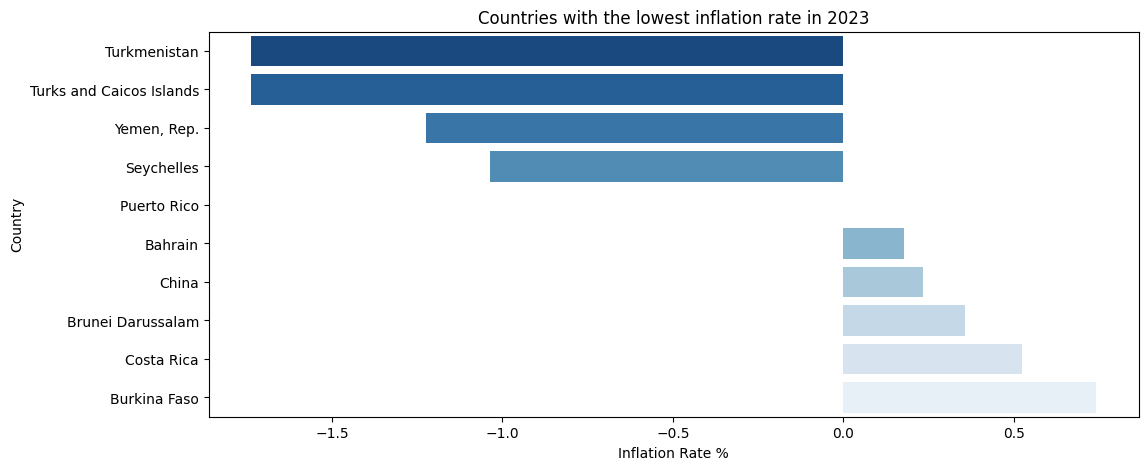

In [94]:
#lowest inflation rate
print(f"\n 10 countries with the lowest inflation rate in : {latest_year} \n ")
plt.figure(figsize=(12 , 5 ))
sns.barplot(y=lowest_inflation['Country'], x=lowest_inflation['hcpia_Inflation'],hue=lowest_inflation['Country'], palette='Blues_r',
            legend = False)
plt.xlabel("Inflation Rate %")
plt.ylabel("Country")
plt.title(f"Countries with the lowest inflation rate in {latest_year}")
plt.show()

### aiming for a dynamic, year-wise comparison of the top and least inflating countries to see trends over time. 


In [95]:
print("\n Determining Highest and lowest inflation countries per year  \n")
#for small data : alt way : top_countries = 
# projdata_long.groupby('Year').apply(lambda x: x.nlargest(10, 'hcpia_Inflation')).reset_index(drop=True)

#faster for large data : sorting , group_by : head(10)
#Sort by year and Inflation descending 
#top_countries = > projdata_long.groupby('Year') -> nlargest(5, 'hcpia_Inflation')
#bottom_countries = projdata_long.groupby("Year") -> nsmallest(5, 'hcpia_Inflation')

#using sort_values and then slicing for faster processing with a bigger dataset here
highest_per_year = ( projdata_long.sort_values(['Year','hcpia_Inflation'],ascending=[True,False]) ).groupby('Year').head(1) 
#df now contains top 5 inflaction rate countries for each year and that year as index

lowest_per_year = (projdata_long.sort_values(['Year', 'hcpia_Inflation'],ascending=[True, True])).groupby('Year').head(1)
#df now contains coutries with the lowest inflation for every year, using year as index    

#creating a custom color palette for each country: 
# unq_country = highest_per_year["Country"].nunique()
# palette_c = sns.color_palette("hls",unq_country) 


 Determining Highest and lowest inflation countries per year  



Plotting Countries with the highest inflation rate per year : 



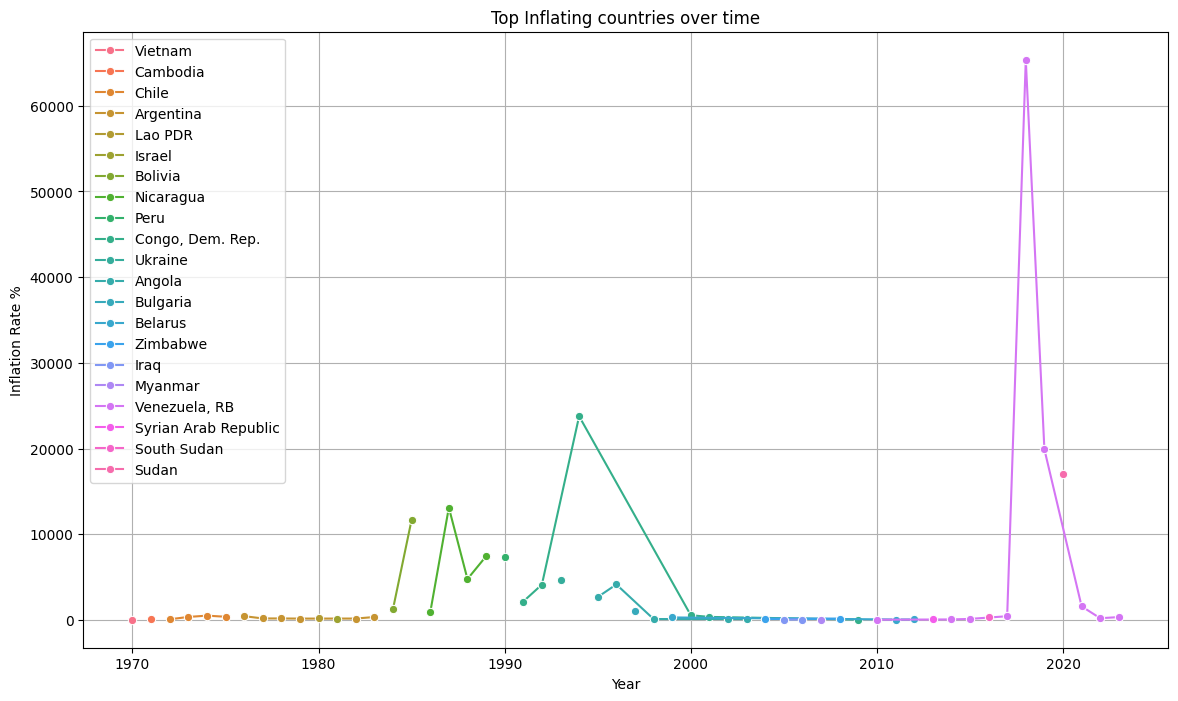

In [96]:
print("Plotting Countries with the highest inflation rate per year : \n")
plt.figure(figsize=(14 , 8))
sns.lineplot(data=highest_per_year,x='Year',y='hcpia_Inflation',hue='Country', marker='o')
plt.xlabel("Year")
plt.ylabel("Inflation Rate %")
plt.title("Top Inflating countries over time")
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Puts legend outside
# plt.tight_layout()
plt.grid(True)
plt.show()


 Plotting countries with the lowest inflation rate per year : 



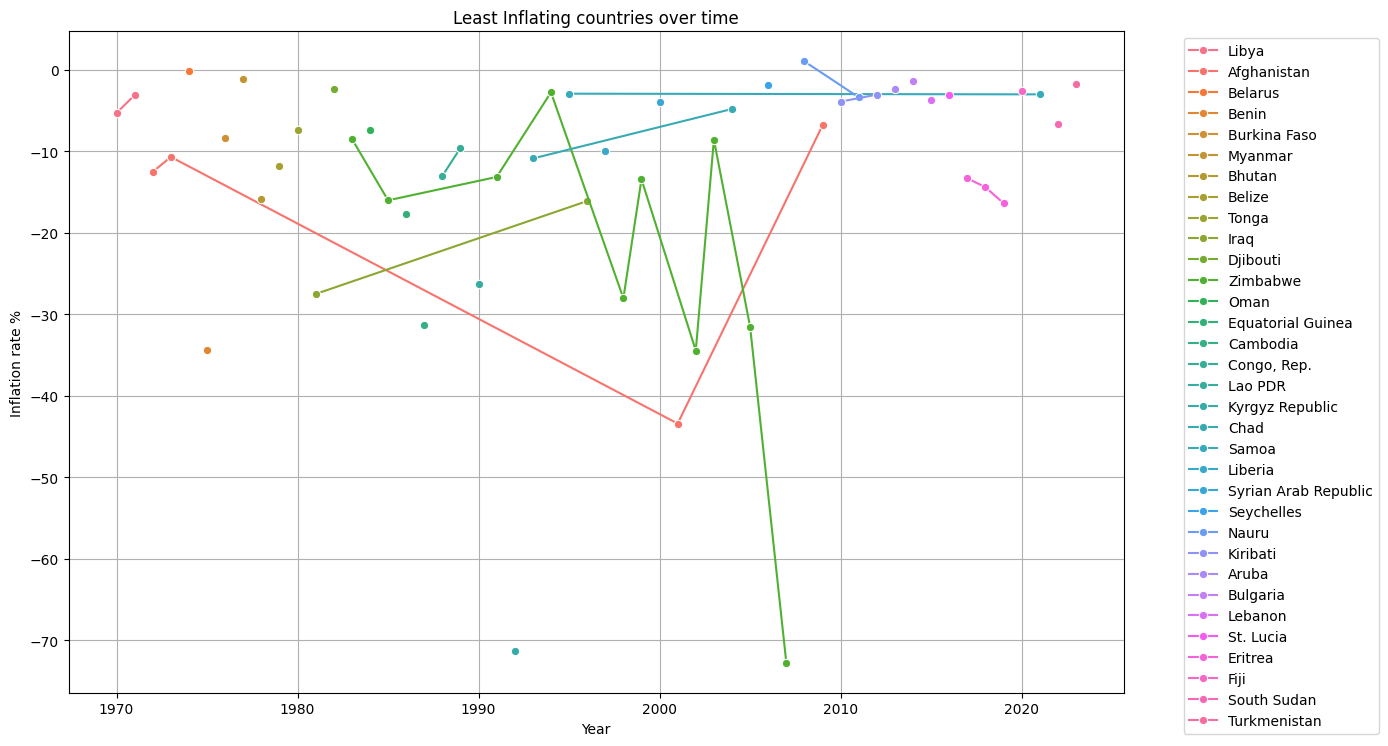

In [97]:
print("\n Plotting countries with the lowest inflation rate per year : \n")
plt.figure(figsize=(14,8))
sns.lineplot(data=lowest_per_year,x='Year',y='hcpia_Inflation',hue='Country',marker='o',linestyle='-')
plt.xlabel('Year')
plt.ylabel("Inflation rate %")
plt.title("Least Inflating countries over time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout ()
#plt.legend()
plt.grid(True)
plt.show()

### Plotting World Inflation Heatmap

In [98]:
#4.
print("Plotting World Inflation Heatmap: \n ")

#creating a choropleth map for inflation rates
fig = px.choropleth ( projdata_long[projdata_long['Year']==latest_year], locations='Country', locationmode = 'country names', color = 'hcpia_Inflation', hover_name = 'Country',title = f'{latest_year} Global Inflation Heatmap', color_continuous_scale = px.colors.sequential.Plasma )

fig.show()

Plotting World Inflation Heatmap: 
 


### Inflation Distribution Analysis : 

Inflation Distribution Analysis : 
Plotting Inflation distribution rate using a histogram  



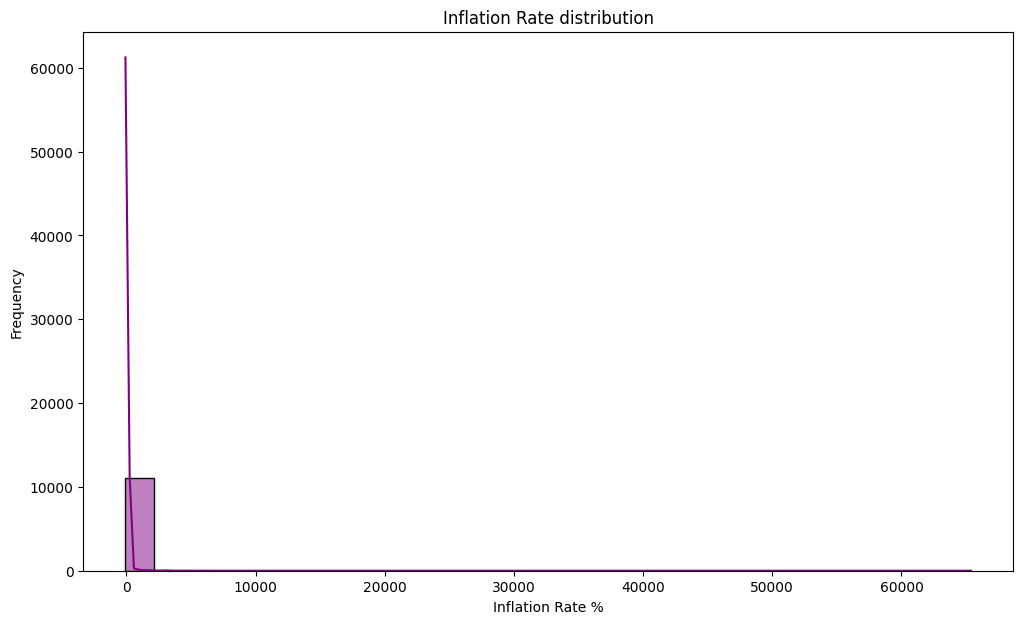

In [99]:
#5.
print("Inflation Distribution Analysis : ")
#Histogram to see inflation distribution
print("Plotting Inflation distribution rate using a histogram  \n")

plt.figure(figsize=(12,7))
sns.histplot(projdata_long['hcpia_Inflation'],bins=30,kde=True,color='purple')
plt.xlabel("Inflation Rate %")
plt.ylabel("Frequency")
plt.title("Inflation Rate distribution")
plt.show()


Plotting a boxplot to identify the outliers 



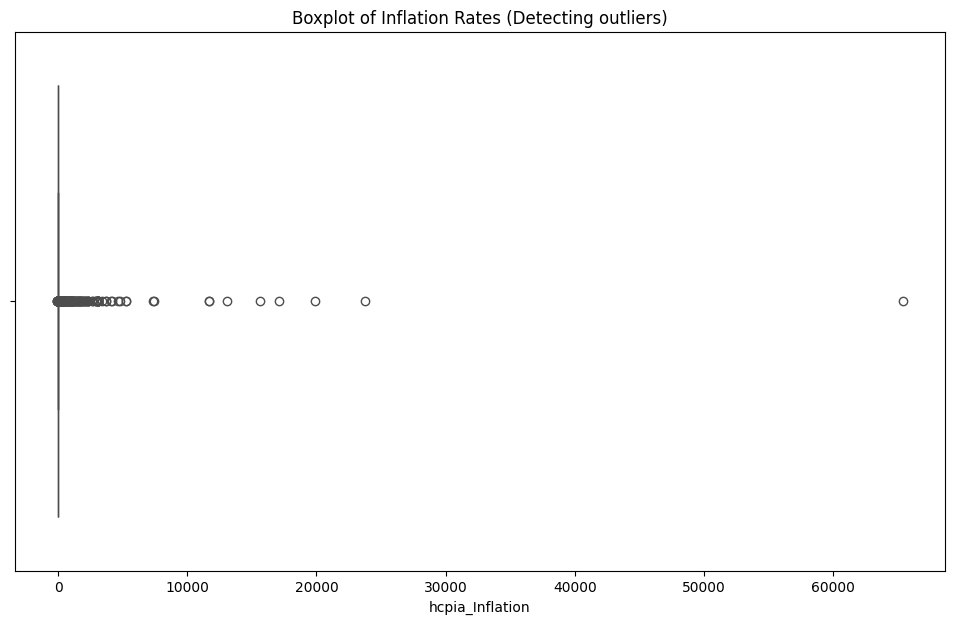

In [100]:
print("Plotting a boxplot to identify the outliers \n")

plt.figure(figsize=(12,7))
sns.boxplot(x=projdata_long['hcpia_Inflation'],color='orange')
plt.title('Boxplot of Inflation Rates (Detecting outliers)')
plt.show()

### EDA phase Completed 

# Time-series forecasting and predicting future inflation

Time-series forecasting and predicting future inflation 

Time series visualization : (rolling averages and Trends) :visual smoothing 



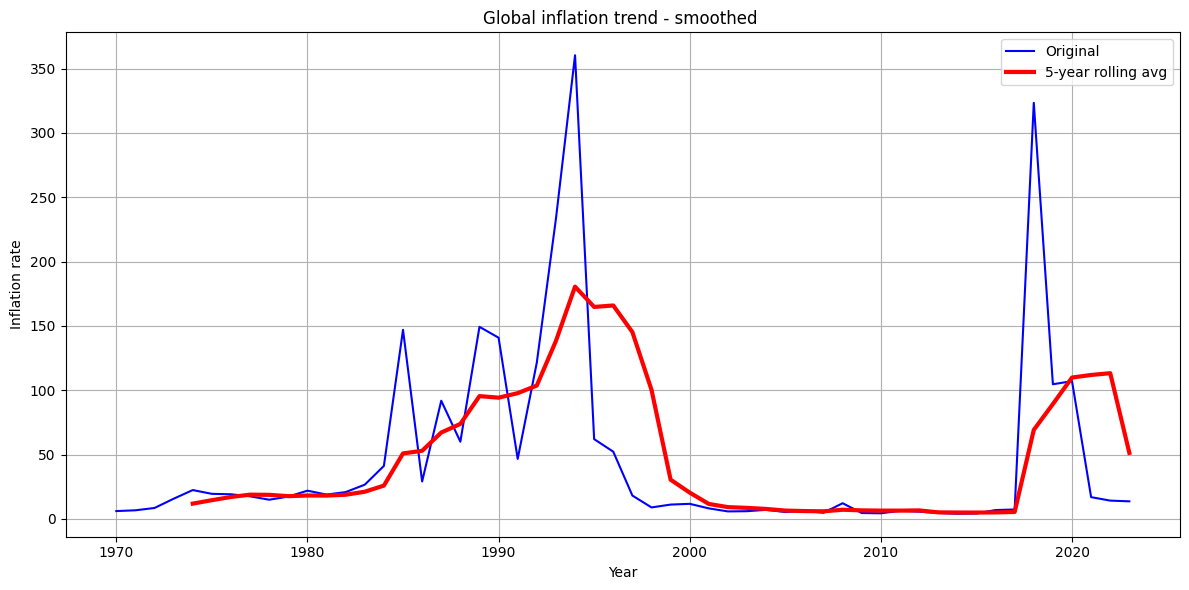

In [101]:
print('Time-series forecasting and predicting future inflation \n')
        
#1.
print('Time series visualization : (rolling averages and Trends) :visual smoothing \n')

plt.figure(figsize=(12,6))

#plot the original graph year vs avg_inflation
plt.plot(Global_avg_inflation,label='Original', color='blue')

#ploting avg_inlation for every 5 years , to see a smoother data with less noise and random spikes 
# in order to understand the trend of inflation
plt.plot(Global_avg_inflation.rolling(window=5).mean(),label="5-year rolling avg", color='red',linewidth='3')

plt.title('Global inflation trend - smoothed ')
plt.xlabel('Year')
plt.ylabel('Inflation rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ARIMA Model creation for prediction

In [102]:
#2.
#auto_regressive model 
#Auto Regressive: Uses past values to predict future ones
#Integrated: Makes the time series stationary by differencing it
#MA: Uses past forecast errors to improve predictions

#ARIMA model
#ARIMA helps us forecast future values in a time series by learning patterns from the past values and their errors.
print("Using gloabal_avg_inflation : a clean, non-volatile trend.")

#check if data is stationary as ARIMA works best on stationary data : constant mean & variance over time
print("using the  Augmented Dickey-Fuller (ADF) test to check data is stationary or not ?: ")

from statsmodels.tsa.stattools import adfuller
print(Global_avg_inflation.head())

Using gloabal_avg_inflation : a clean, non-volatile trend.
using the  Augmented Dickey-Fuller (ADF) test to check data is stationary or not ?: 
Year
1970     6.098704
1971     6.700820
1972     8.513989
1973    15.701141
1974    22.426634
Name: hcpia_Inflation, dtype: float64


In [103]:
result = adfuller(Global_avg_inflation)
print(f"ADF Statistic: {result[0]}") #more negative : more stationary  #-4.37 : less than threshold of 1%
pvalue = result[1]
print(f"p-value: {result[1]}") #
if(pvalue < 0.05):
    setARIMA = True
    print('stationary data : use ARIMA as-is : 1,1,1')
else:
    print('Data is not stationary')

ADF Statistic: -4.36727213939929
p-value: 0.0003390233522633275
stationary data : use ARIMA as-is : 1,1,1


In [104]:
if setARIMA:
    from statsmodels.tsa.arima.model import ARIMA
    Global_avg_inflation_f = Global_avg_inflation.copy()
    Global_avg_inflation_f.index = pd.to_datetime(Global_avg_inflation_f.index.astype(str), format='%Y')
    
    Global_avg_inflation_f = Global_avg_inflation_f.asfreq('YS')
    print(Global_avg_inflation_f.index.freq)

    model= ARIMA(Global_avg_inflation_f, order=(1,1,1))
    model_fit = model.fit()
    print(model_fit.summary()) #future values are dependent on past values \
        
print("Model summary shows future values dependent on past values ")
print('Forecasting future 10 years using the ARIMA model :\n')
forecast = model_fit.forecast(steps=10)

<YearBegin: month=1>
                               SARIMAX Results                                
Dep. Variable:        hcpia_Inflation   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -299.789
Date:                Wed, 16 Apr 2025   AIC                            605.577
Time:                        00:58:15   BIC                            611.488
Sample:                    01-01-1970   HQIC                           607.850
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4776      0.178      2.681      0.007       0.128       0.827
ma.L1         -0.9982      2.898     -0.344      0.731      -6.679       4.682
sigma2      4531.2741    1.3e+0

In [105]:
#xlabel : creating an index of 10 years in future 
forecasted_for_years = np.arange(Global_avg_inflation.index.max()+1,Global_avg_inflation.index.max() + 11)
#creates a range of 10 years

In [106]:
plt.figure(figsize=(16,6))
#plt.plot(Global_avg_inflation,label='Historical Inflation',color="blue",linewidth='2')

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

## plotting the forecasted future inflation  and Plotting a comparison b/w historical inflation data and current predicted future Inflation

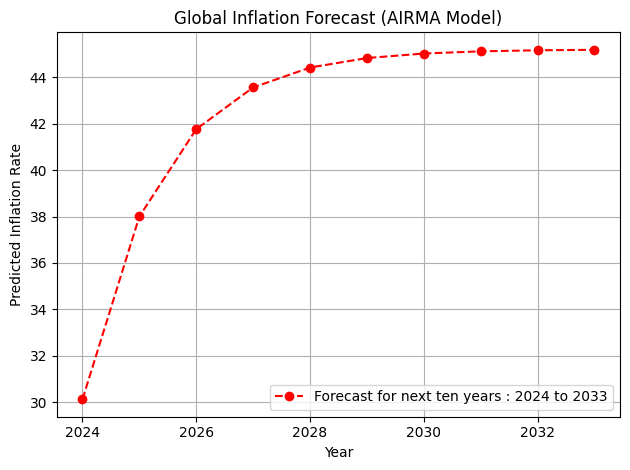

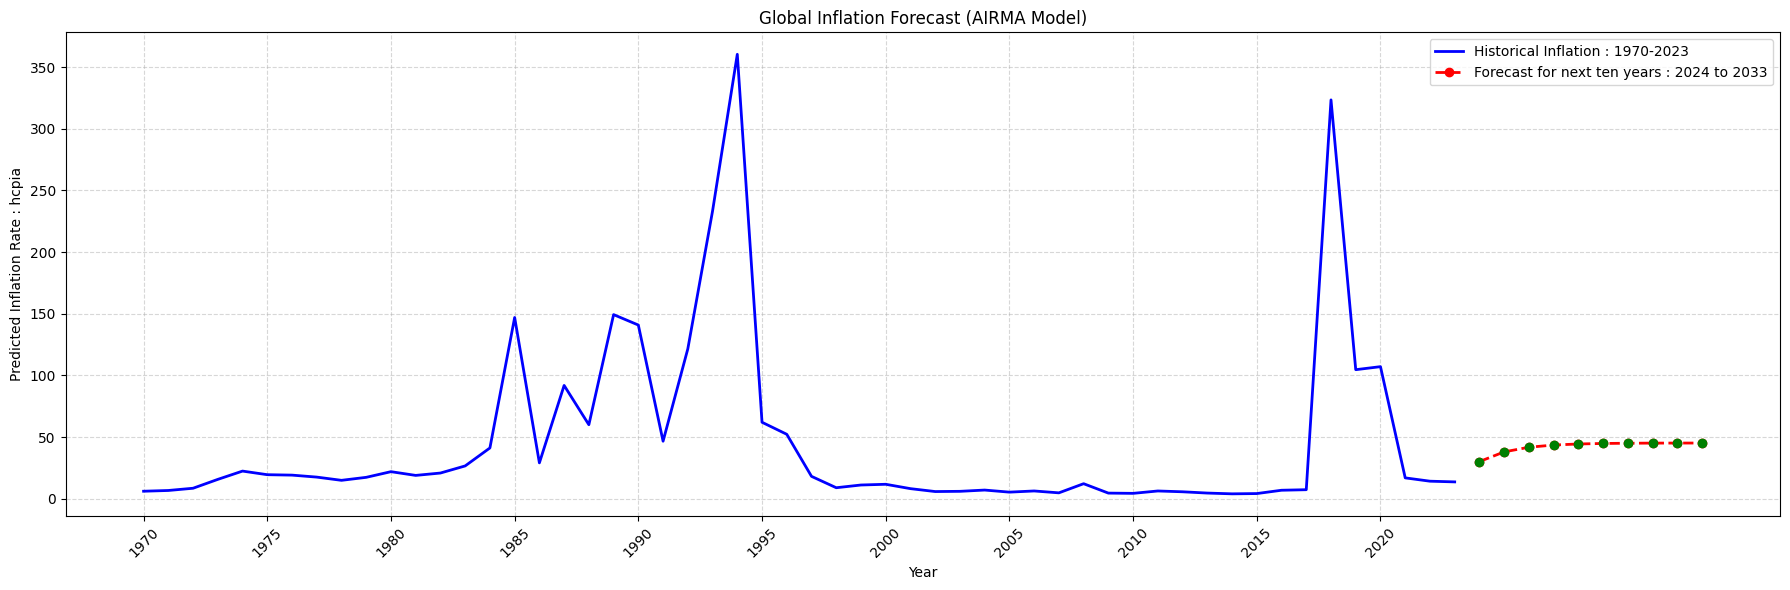

In [107]:
#plotting the forecasted future inflation     

plt.plot(forecasted_for_years,forecast,label=f'Forecast for next ten years : {latest_year+1} to {latest_year+10}', color='red',linestyle='--',marker='o')
plt.title("Global Inflation Forecast (AIRMA Model)")
plt.xlabel("Year")
plt.ylabel("Predicted Inflation Rate")
plt.legend()
plt.grid(True)

# plt.xticks(rotation=45)
# plt.xticks(ticks=np.arange(1970,2023,5))

plt.tight_layout()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(Global_avg_inflation.index, Global_avg_inflation.values,label='Historical Inflation : 1970-2023',color="blue",linewidth='2')
plt.plot(forecasted_for_years,forecast,label=f'Forecast for next ten years : {latest_year+1} to {latest_year+10}', color='red',linestyle='--',marker='o',linewidth=2,markersize=6)

plt.scatter(forecasted_for_years,forecast,color='green',zorder=5)
plt.xlabel("Year")
plt.ylabel("Predicted Inflation Rate : hcpia")
plt.title("Global Inflation Forecast (AIRMA Model)")
plt.xticks(np.arange(1970,2023,5),rotation=45)
plt.grid(True,linestyle='--',alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()

# Feature engineering for Inflation Analysis

In [108]:
print("\n Feature engineering for Inflation Analysis \n ")

#1.
#convert global trend series to a dataframe
#converting to data frame so that we can add columns like lag_values, rolling averages
Avg_inflation_df = Global_avg_inflation.reset_index()
Avg_inflation_df.columns = ['Year' , 'Avg_hcpia_Inflation']


 Feature engineering for Inflation Analysis 
 


In [109]:
#2.
#lag values : this is a time series , past values strongly affect the future values 
#lag values : Giving model memory of inflation_value of just a year ago to help with better prediction

#memory of past year's inflation : for every year its avg_inflation in past year is being stored
Avg_inflation_df['Inflation_Lag1'] = Avg_inflation_df['Avg_hcpia_Inflation'].shift(1)
#memory of past year's past year's inflation : for every year its avg_inflation for 2 years before is being stored
Avg_inflation_df['Inflation_Lag2'] = Avg_inflation_df['Avg_hcpia_Inflation'].shift(2)

print('Lag features used to capture memory of past inflation to model/predict future inflation better \n')


Lag features used to capture memory of past inflation to model/predict future inflation better 



In [110]:
#3.
print('To smooth out short-term noise and highlight long-term trends : adding rolling features/ moving averages to reduce variance and outliers in the raw inflation data \n')
#avoids sudden spikes or drops , adds a trendiness : better for model prediction
Avg_inflation_df["Inflation_MA3"] = Avg_inflation_df['Avg_hcpia_Inflation'].rolling(window=3).mean()
Avg_inflation_df['Inflation_MA5'] = Avg_inflation_df['Avg_hcpia_Inflation'].rolling(window=5).mean()

#scope to plot a visual comparision graph here

To smooth out short-term noise and highlight long-term trends : adding rolling features/ moving averages to reduce variance and outliers in the raw inflation data 



#### Above 0 : Comparitively increased , below 0 : comparitevly decresed , big spikes or drops : shocks


Precentage Change in Inflation (decline/growth) year over year 



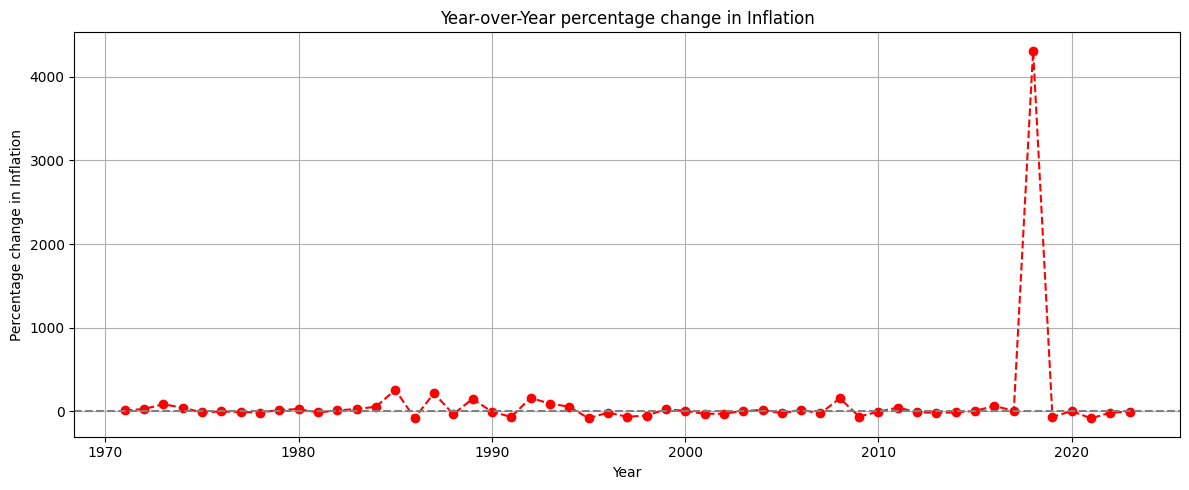

In [111]:
#4.
print('Precentage Change in Inflation (decline/growth) year over year \n')
#Better trend direction , volatility detection to check for shocks in the data , to check feature usefulness
Avg_inflation_df['Inflation_pct_change']=Avg_inflation_df['Avg_hcpia_Inflation'].pct_change() * 100

plt.figure(figsize=(12,5))
plt.plot(Avg_inflation_df['Year'],Avg_inflation_df['Inflation_pct_change'],color='red', marker='o',linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--') #a reference line  at 0
plt.title('Year-over-Year percentage change in Inflation')
plt.xlabel('Year')
plt.ylabel('Percentage change in Inflation')
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
print('hcpia Avg_inflation data feature_engineered : ')
print(Avg_inflation_df.tail(10))

hcpia Avg_inflation data feature_engineered : 
    Year  Avg_hcpia_Inflation  Inflation_Lag1  Inflation_Lag2  Inflation_MA3  \
44  2014             3.983953        4.607088        5.643928       4.744990   
45  2015             4.202230        3.983953        4.607088       4.264424   
46  2016             6.890869        4.202230        3.983953       5.025684   
47  2017             7.331936        6.890869        4.202230       6.141679   
48  2018           323.413338        7.331936        6.890869     112.545381   
49  2019           104.651808      323.413338        7.331936     145.132361   
50  2020           107.105032      104.651808      323.413338     178.390059   
51  2021            16.923136      107.105032      104.651808      76.226659   
52  2022            14.231114       16.923136      107.105032      46.086427   
53  2023            13.666205       14.231114       16.923136      14.940152   

    Inflation_MA5  Inflation_pct_change  
44       4.981969            -

# Interactive summary visualization phase :


In [113]:
#1.
print('Interactive Line plot : Global Inflation Trend \n')

fig = px.line(Avg_inflation_df, x ='Year', y = 'Avg_hcpia_Inflation', title='Interactive Global Inflation Trend')
fig.update_traces(line=dict(color='blue'))
fig.update_layout(yaxis_title='Inflation Rate%', xaxis_title='Year')
fig.show()

Interactive Line plot : Global Inflation Trend 



In [114]:
#2.
print('Heatmap of Inflation : Country VS year \n')

#countries as rows , years as cols : pivot into heatmap_data
# projdata_long = analysis_col.melt(id_vars=["Country"], var_name="Year", value_name="hcpia_Inflation")
# Aggregate duplicate entries
projdata_grouped = projdata_long.groupby(["Country", "Year"])["hcpia_Inflation"].mean().nlargest(20).reset_index()

heatmap_data = projdata_grouped.pivot(index='Country',columns='Year',values='hcpia_Inflation')

#plotting the heatmap
fig = px.imshow(heatmap_data, aspect='auto', color_continuous_scale='RdYlGn_r', title='Heatmap of Inflation rates by Country (1970-2023)',labels=dict(x='Year',y='Country',color='Inflation rate %'))

fig.update_layout(
    xaxis_title='Year',yaxis_title='Country',autosize=False,width=1000,height=1400,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

Heatmap of Inflation : Country VS year 



#5.3 animated graphs : future scope
